<a href="https://colab.research.google.com/github/madhura2024/ML-IMPLEMENTATIONS/blob/main/Customer_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Epoch 1/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9650 - val_loss: 0.6176
Epoch 2/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5503 - val_loss: 0.4605
Epoch 3/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4404 - val_loss: 0.4081
Epoch 4/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4006 - val_loss: 0.3774
Epoch 5/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3747 - val_loss: 0.3567
Epoch 6/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3527 - val_loss: 0.3425
Epoch 7/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3355 - val_loss: 0.3305
Epoch 8/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3273 - val_loss: 0.3212
Epoch 9/20
355/355 ━━━━━━━━━━━━━━━━━━━

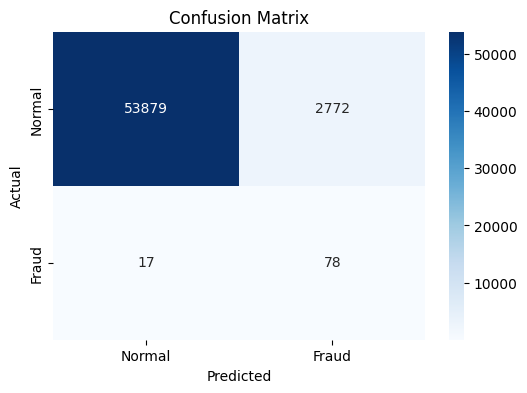

In [1]:
!pip install -q numpy pandas scikit-learn matplotlib seaborn tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense









df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")
print("Columns:", df.columns)
df = df.dropna().drop_duplicates()






scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))



X = df.drop('Class', axis=1).values
y = df['Class'].values






X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train_auto = X_train[y_train == 0]






input_dim = X_train_auto.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")








history = autoencoder.fit(
    X_train_auto, X_train_auto,
    epochs=20,   # longer training for better results
    batch_size=512,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)






X_test_pred = autoencoder.predict(X_test, verbose=0)
mse = np.mean(np.square(X_test - X_test_pred), axis=1)






X_train_pred = autoencoder.predict(X_train_auto, verbose=0)
train_mse = np.mean(np.square(X_train_auto - X_train_pred), axis=1)
threshold = np.percentile(train_mse, 95)
print("Threshold:", threshold)


y_pred = (mse > threshold).astype(int)

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, digits=4))
# print("ROC-AUC:", roc_auc_score(y_test, y_pred))

# # -------------------------------------------------------
# # 8. Confusion Matrix










cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Normal","Fraud"],
            yticklabels=["Normal","Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
